In [1]:
#reading cleaned dataset
import pandas as pd
csv = './term_freq_df.csv'
term_freq_df = pd.read_csv(csv,index_col=0)
term_freq_df.head()


,negative,positive,total
aa,10,37,47
aaa,0,0,0
aaaa,0,0,0
aaaaa,0,0,0
aaaaaa,0,1,1


In [4]:
import numpy as np
from matplotlib import pyplot as plt

y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

Text(0.5, 1.0, 'Top 500 tokens in tweets')

In [2]:
# Tweets Tokens Visualisation

In [5]:
csv = './clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()
#removing duplicate values
my_df = my_df.drop_duplicates(subset='clean_text', keep='first')

from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(my_df.clean_text)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,11,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [6]:
document_matrix = cvec.transform(my_df.clean_text)

In [7]:
%%time
neg_batches = np.linspace(0,798179,10).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    print (neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

88686 entries' term freuquency calculated
177373 entries' term freuquency calculated
266059 entries' term freuquency calculated
354746 entries' term freuquency calculated
443432 entries' term freuquency calculated
532119 entries' term freuquency calculated
620805 entries' term freuquency calculated
709492 entries' term freuquency calculated
798179 entries' term freuquency calculated
CPU times: user 17.4 s, sys: 23.2 s, total: 40.6 s
Wall time: 52.2 s


In [8]:
%%time
pos_batches = np.linspace(798179,1596019,10).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    print (pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

886827 entries' term freuquency calculated
975476 entries' term freuquency calculated
1064125 entries' term freuquency calculated
1152774 entries' term freuquency calculated
1241423 entries' term freuquency calculated
1330072 entries' term freuquency calculated
1418721 entries' term freuquency calculated
1507370 entries' term freuquency calculated
1596019 entries' term freuquency calculated
CPU times: user 16.7 s, sys: 20.5 s, total: 37.3 s
Wall time: 38.5 s


In [57]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
apple,16738,170830,187568
twitter,125745,27189,152934
amazon,10681,118503,129184
new,54162,73551,127713
iphone,4572,118947,123519
facebook,20757,98007,118764
instagram,104018,5150,109168
windows,4926,82577,87503
just,45796,39849,85645
xbox,1360,82749,84109


In [58]:
term_freq_df2.to_csv('./term_freq_df2_twitter.csv',encoding='utf-8')

Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

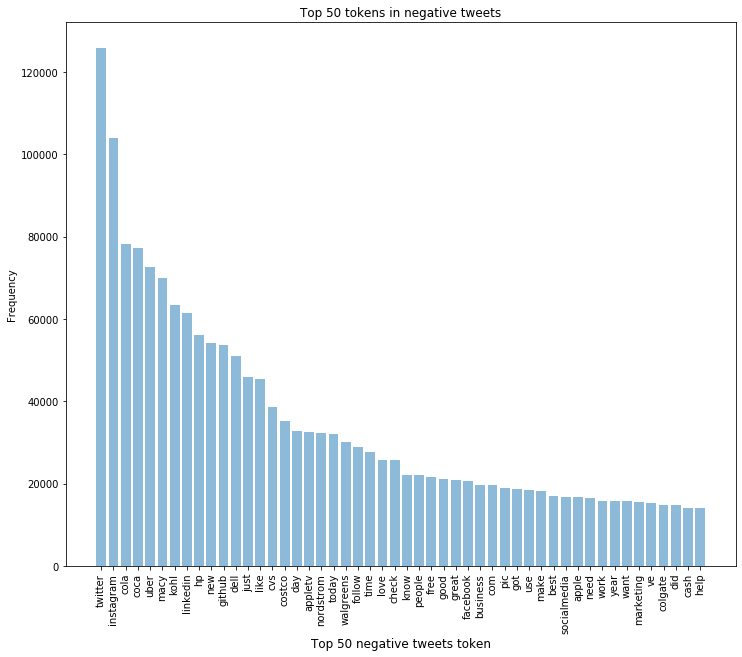

In [35]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tweets token',  fontsize=12)
plt.title('Top 50 tokens in negative tweets', fontsize = 12)

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

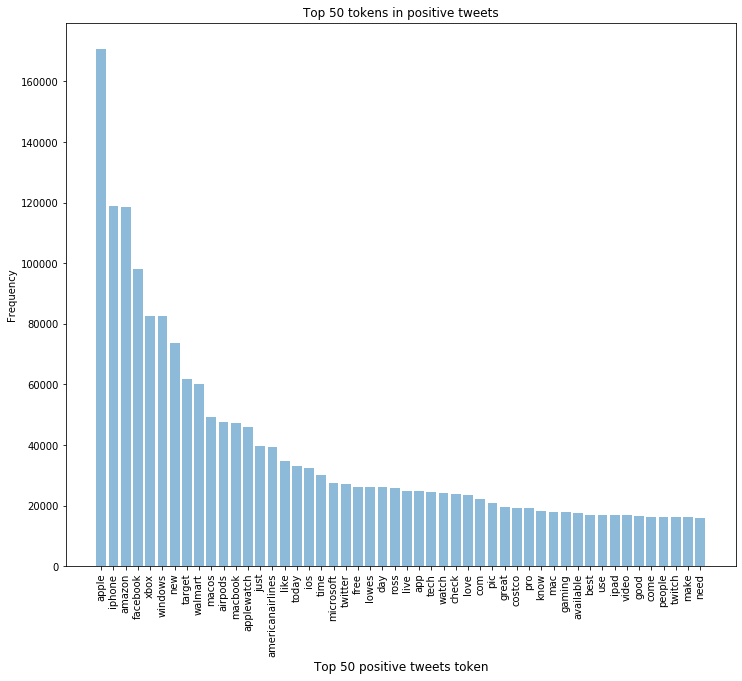

In [56]:
 y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tweets token',  fontsize=12)
plt.title('Top 50 tokens in positive tweets', fontsize = 12)


Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

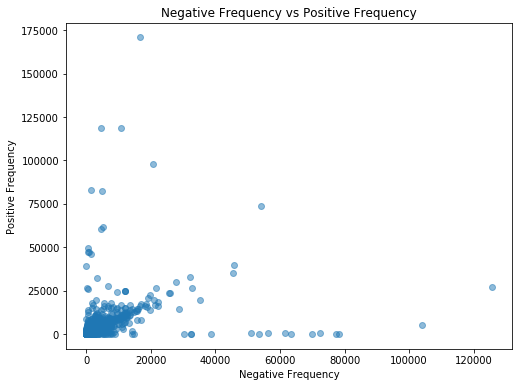

In [12]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [13]:
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='pos_rate', ascending=False).iloc[:10]

,negative,positive,total,pos_rate
justplaytoys,0,346,346,1.0
vmtl,0,337,337,1.0
vml,0,324,324,1.0
rolandmartinunfiltered,0,1449,1449,1.0
magsafe,0,316,316,1.0
lowescareers,0,426,426,1.0
litfic,0,376,376,1.0
justplayproducts,0,347,347,1.0
justplayallday,0,346,346,1.0
jingwatchface,0,456,456,1.0


In [14]:
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct
apple,16738,170830,187568,0.910763,0.019449
iphone,4572,118947,123519,0.962985,0.013542
amazon,10681,118503,129184,0.917319,0.013491
facebook,20757,98007,118764,0.825225,0.011158
xbox,1360,82749,84109,0.983831,0.009421
windows,4926,82577,87503,0.943705,0.009401
new,54162,73551,127713,0.575908,0.008374
target,5273,61864,67137,0.921459,0.007043
walmart,4441,60249,64690,0.931350,0.006859
macos,522,49364,49886,0.989536,0.005620


In [15]:
from scipy.stats import hmean

term_freq_df2['pos_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])
                                                                   if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean
apple,16738,170830,187568,0.910763,0.019449,0.038084
iphone,4572,118947,123519,0.962985,0.013542,0.026708
amazon,10681,118503,129184,0.917319,0.013491,0.026591
facebook,20757,98007,118764,0.825225,0.011158,0.022018
xbox,1360,82749,84109,0.983831,0.009421,0.018663
windows,4926,82577,87503,0.943705,0.009401,0.018617
new,54162,73551,127713,0.575908,0.008374,0.016507
target,5273,61864,67137,0.921459,0.007043,0.013979
walmart,4441,60249,64690,0.931350,0.006859,0.013618
macos,522,49364,49886,0.989536,0.005620,0.011176


In [24]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
#term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
#term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:10]
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf
apple,16738,170830,187568,0.910763,0.019449,0.038084,0.984533,1.0,0.089237,0.002001,0.003915,0.015467,1.000000
iphone,4572,118947,123519,0.962985,0.013542,0.026708,0.992509,1.0,0.037015,0.000547,0.001077,0.007491,0.875919
amazon,10681,118503,129184,0.917319,0.013491,0.026591,0.985826,1.0,0.082681,0.001277,0.002515,0.014174,0.998830
facebook,20757,98007,118764,0.825225,0.011158,0.022018,0.956149,1.0,0.174775,0.002482,0.004894,0.043851,1.000000
xbox,1360,82749,84109,0.983831,0.009421,0.018663,0.994497,1.0,0.016169,0.000163,0.000322,0.005503,0.564298
windows,4926,82577,87503,0.943705,0.009401,0.018617,0.990132,1.0,0.056295,0.000589,0.001166,0.009868,0.896931
new,54162,73551,127713,0.575908,0.008374,0.016507,0.653676,1.0,0.424092,0.006476,0.012757,0.346324,1.000000
target,5273,61864,67137,0.921459,0.007043,0.013979,0.986593,1.0,0.078541,0.000630,0.001251,0.013407,0.914895
walmart,4441,60249,64690,0.931350,0.006859,0.013618,0.988283,1.0,0.068650,0.000531,0.001054,0.011717,0.867430
macos,522,49364,49886,0.989536,0.005620,0.011176,0.994953,1.0,0.010464,0.000062,0.000124,0.005047,0.461291


In [27]:
term_freq_df2['neg_rate'] = term_freq_df2['negative'] * 1./term_freq_df2['total']
term_freq_df2['neg_freq_pct'] = term_freq_df2['negative'] * 1./term_freq_df2['negative'].sum()
term_freq_df2['neg_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])
                                                                   if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2['neg_rate_normcdf'] = normcdf(term_freq_df2['neg_rate'])
term_freq_df2['neg_freq_pct_normcdf'] = normcdf(term_freq_df2['neg_freq_pct'])
#term_freq_df2['neg_normcdf_hmean'] = hmean([term_freq_df2['neg_rate_normcdf'], term_freq_df2['neg_freq_pct_normcdf']])
term_freq_df2.sort_values(by='neg_rate_normcdf', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf
juco,481,0,481,0.0,0.0,0.0,0.004191,0.407225,1.0,5.751076e-05,1.150149e-04,0.995809,0.456262
followvintage,1,0,1,0.0,0.0,0.0,0.004191,0.407225,1.0,1.195650e-07,2.391299e-07,0.995809,0.398110
eclectics,2,0,2,0.0,0.0,0.0,0.004191,0.407225,1.0,2.391300e-07,4.782598e-07,0.995809,0.398229
uberrape,407,0,407,0.0,0.0,0.0,0.004191,0.407225,1.0,4.866295e-05,9.732116e-05,0.995809,0.447202
houdinidancing,536,0,536,0.0,0.0,0.0,0.004191,0.407225,1.0,6.408683e-05,1.281654e-04,0.995809,0.463010
wodehouse,5010,0,5010,0.0,0.0,0.0,0.004191,0.407225,1.0,5.990205e-04,1.197324e-03,0.995809,0.901514
kohlscashsweepstakes,467,0,467,0.0,0.0,0.0,0.004191,0.407225,1.0,5.583685e-05,1.116675e-04,0.995809,0.454546
morogoro,359,0,359,0.0,0.0,0.0,0.004191,0.407225,1.0,4.292383e-05,8.584397e-05,0.995809,0.441341
photodeals,346,0,346,0.0,0.0,0.0,0.004191,0.407225,1.0,4.136948e-05,8.273554e-05,0.995809,0.439755
divasdenfashion,346,0,346,0.0,0.0,0.0,0.004191,0.407225,1.0,4.136948e-05,8.273554e-05,0.995809,0.439755


Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

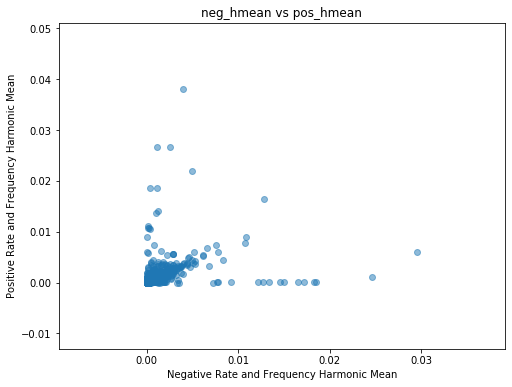

In [28]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

Text(0.5, 1.0, 'neg_normcdf_hmean vs pos_normcdf_hmean')

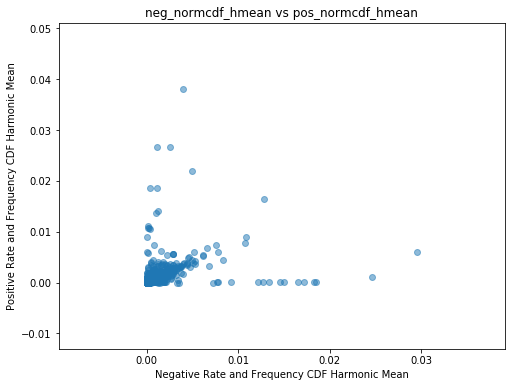

In [30]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')